<a href="https://colab.research.google.com/github/wintera71/BEACO2N-Modules/blob/main/Lesson%204%3A%20The%20Carbon%20Cycle/IN_CLASS_The_Carbon_Cycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BEACO2N Notebook 4a: The Carbon Cycle**

Notebook developed by: *Arushi Sharma, Anna Winter, Skye Pickett, Alec Morgan, Lan Dinh, Su Min Park, Amy Castillo*

### Learning Outcomes
Working through this notebook, you will learn about:
1. Background CO2 concentrations in the Bay Area and how these change throughout the year
1. Identifying and representing missing values
1. Filtering data


## Table of Contents
1. Preview and Notebook Setup
>1.1 Objective
<br>1.2 Setting Up Our Notebook
1. CO2 Seasonal Cyle in the Bay Area
>2.1 Keeling Curve
<br>2.2 CO2 Concentration from BEACO2N Sites
1. Exploratory Data Analysis
>3.1 10th Percentile
<br>3.2 Filtering to Daytime only
<br>3.3 Plotting the Daytime CO2 Concentration Levels


*Note: In this notebook, there may be some more advanced topics that are "optional". This means you can just read over these sections; don't worry about fully understanding these parts unless you are really interested. They may be useful later in the course, but for now they are not necessary, so feel free to just skim the parts labelled "Optional"!*


<hr style="border: 2px solid #003262">
<hr style="border: 2px solid #C9B676">


##1. Preview and Notebook Setup



####1.1 Objective
In our analysis, we will be observing the Northern Hemisphere CO2 cycle. We will be using BEACO2N data ([source](http://beacon.berkeley.edu/)) to answer the following question: <BR>**How does the background CO2 concentration change throughout the year?**

#### 1.2 Setting Up Our Notebook
In this notebook, you'll be using the library we learned about in a previous notebook, *pandas*, to manipulate DataFrames and understand large amounts of data.

*Reminder:* Pandas is a popular open-source data manipulation and analysis library for the Python programming language. It provides easy-to-use data structures and data analysis tools, making it a powerful tool for working with structured data.



Let's start by loading some packages we will need. Most of these we've learned about in our last two notebooks! Remember that they need to imported in any notebook we want to work in. **Run the cell below to import them.**

>*Reminder:* To run a cell...
* Click the **Play icon** in the left gutter of the cell **OR**
* Click **Shift+Enter** or **Shift+Return** on your computer keyboard to run the cell and move focus to the next cell

In [ ]:
# Run this cell

# Used for visualizations
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical computation
import numpy as np
from decimal import Decimal

# Manipulating data in form of series or dataframes
import pandas as pd

# Manipulating fields that are date or time
import datetime
from datetime import time

Since we're going to be creating visualizations in this notebook, it can be easiest to set some parameters in advance. Consider this like setting the stage for a show, so everything will be shown in the same view. **Run the cell below.** If any warning pops up, press "run anyway".

If you get any error saying "matplotlib is not defined", that means you haven't run the cell above this. Run that one *first* then the one below next.

In [ ]:
# Using this cell, we will be defining some matplotlib parameters for the plots that we would be creating.
matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['axes.titlesize'] = 20
matplotlib.rcParams['axes.labelsize'] = 20
plt.rcParams['figure.figsize'] = [20, 14]
plt.rcParams['axes.labelweight'] = 'bold'
np.set_printoptions(suppress=True)
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['savefig.facecolor']= '#FFFFFF'

***
##2. CO2 Seasonal Cycle in the Bay Area
###2.1 Keeling Curve

The **"Keeling Curve"** refers to a graph that shows the ongoing *increase* of carbon dioxide (CO2) levels in the Earth's atmosphere over time. It is named after Charles David Keeling, an American scientist who began measurements of atmospheric CO2 concentrations at the Mauna Loa Observatory in Hawaii in 1958.

The Keeling Curve is an important tool in studying the long-term trend of CO2 concentrations and its correlation with climate change. **It shows a consistent upward trend in CO2 concentrations with seasonal variations, reflecting the influence of natural processes such as photosynthesis in the Northern Hemisphere during the summer months.** The overall increase in CO2 concentrations is **primarily attributed to *human activities*** like the burning of fossil fuels and deforestation.
<br>
<br>
###2.2 CO2 Concentration from BEACO2N Sites

This trend has been observed at the Mauna Loa Observatory, and we can analyze the seasonal cycle *in the Bay Area* too! **Let's pull data from multiple BEACO2N sites to find the background CO2 concentration in the Bay Area.**

In the cell below, we defined a function called `co2` that pulls in data from BEACO2N based on the given start and end points of the time period and any specific nodes requested. *You are NOT expected to understand the code in the cell below* but **DO run the cell (or the function won't work!).**

In [ ]:
# This function will pull in the Beacon data for a time period given by start and end points, for any nodes passed in as arguments.
# Note: You are not expected to understand the code.
## RUN THIS CELL

def co2(start, end, *nodes):
    full = pd.DataFrame()
    for node in nodes:
        parameter = 'co2_corrected_avg_t_drift_applied-level-2'
        filename = 'http://128.32.208.8/node/' + node + '/measurements_all/csv?name=Supersite&interval=60&variables=' + parameter + '&start=' + start + '&end=' + end
        data = pd.read_csv(filename, on_bad_lines='skip', index_col=[0], parse_dates=[0])
        data = data.rename(columns={parameter:node})
        data = data.drop(['epoch','node_id','node_file_id','datetime'], axis=1)
        full = pd.merge(full, data, how='outer', left_index=True, right_index=True)
    return full

In the cell below, we use the function `co2` defined above to pull the 2021 CO2 data from multiple BEACO2N sites. Based on the code within the "def" statement of the function above, when this function is run, it will create a *pandas* DataFrame with the pulled data where **each column is a different site in the network.**

*Note: This cell will take around 1 minute to run (not instantaneous like many others). You'll know it's done when there is a small green check mark to the left of the cell and the words `CO2_vals = `.*

In [ ]:
CO2_vals = co2('2021-01-01%2000:00:00', '2021-12-31%2000:00:00', '41', '45', '47', '63', '81', '26', '21', '25', '11', '78', '57')
CO2_vals

,41,45,47,63,81,26,21,25,11,78,57
local_timestamp,,,,,,,,,,,
2021-01-01 00:00:00,456.017316,478.311917,472.527666,457.843485,456.227262,516.597320,455.384203,441.388594,474.153506,NaN,NaN
2021-01-01 01:00:00,503.171393,489.185970,470.419742,461.186613,456.186365,486.342687,466.203516,445.640017,476.921038,NaN,NaN
2021-01-01 02:00:00,497.273704,508.522232,464.400086,456.277776,446.983148,465.720543,494.167616,447.144204,472.313633,NaN,NaN
2021-01-01 03:00:00,503.214112,509.771089,479.796226,472.331156,453.625894,498.277757,469.978429,442.265893,476.724706,NaN,NaN
2021-01-01 04:00:00,499.710018,505.091756,474.368979,473.563225,472.004782,512.201767,490.993720,449.445706,466.343059,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30 20:00:00,455.011765,469.831418,NaN,497.594387,458.012793,475.589482,442.768283,439.815156,NaN,443.400330,484.101110
2021-12-30 21:00:00,470.736515,503.280488,NaN,529.173011,457.600679,513.176268,433.116585,441.863745,NaN,443.200747,494.545424
2021-12-30 22:00:00,463.010196,499.626146,NaN,501.190631,446.290134,500.289554,429.041297,442.481081,NaN,442.578272,502.410015


####2.2.1 Investigation
To start off, let's investigate our `CO2_vals` table!

The function `sort_values(<column_name>)` sorts values of a DataFrame based on whatever column is specified in the parentheses. In the cell below, we'll practice this by sorting the rows in order of the values of Node 47 (the column `47`).

**Can you spot any strange values in the DataFrame below?**

*Hint: Take a closer look at the column `47`.*

In [ ]:
CO2_vals.sort_values("47")

,41,45,47,63,81,26,21,25,11,78,57
local_timestamp,,,,,,,,,,,
2021-12-13 13:00:00,416.873346,422.905011,-999.0,413.634736,419.841534,416.879625,419.338552,427.269168,NaN,423.135917,419.425652
2021-12-13 12:00:00,416.963249,426.009044,-999.0,412.779482,417.454457,418.939974,419.513671,424.638944,NaN,422.684033,427.696020
2021-12-13 11:00:00,417.756649,430.514055,-999.0,413.681189,419.504590,421.349811,421.747059,422.839160,NaN,424.587971,436.780203
2021-12-13 10:00:00,421.185930,434.133003,-999.0,426.605002,424.709824,422.455206,424.398448,425.854799,NaN,434.449291,428.805505
2021-12-13 09:00:00,421.756834,437.669139,-999.0,432.102269,436.027025,426.466002,429.666028,434.032029,NaN,439.342845,448.822653
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30 20:00:00,455.011765,469.831418,NaN,497.594387,458.012793,475.589482,442.768283,439.815156,NaN,443.400330,484.101110
2021-12-30 21:00:00,470.736515,503.280488,NaN,529.173011,457.600679,513.176268,433.116585,441.863745,NaN,443.200747,494.545424
2021-12-30 22:00:00,463.010196,499.626146,NaN,501.190631,446.290134,500.289554,429.041297,442.481081,NaN,442.578272,502.410015


####2.2.2 Missing Values
Hopefully you spotted the values that are all `-999.0` and `NaN`. Some of the values contain -999 as a CO2 concentration value, which is an invalid input since a concentration can't be negative. In reality, -999 is a very common number used to represent missing values. Other common numbers used for missing values include -9999, -1111, -111, and so on.

In practice, we want to exclude these numbers from our dataset, as they can significantly impact calculations such as averages or summations. When we make calculations, they get treated as correct values and a value like -999 would skew our statistics significantly. Therefore, we will replace these numbers that represent missing data with the NaN value, a more suitable representation for missing data. This is much preferred because `NaN` is treated as it's own type, not as a number to include in the calculation.

####2.2.3 Modifying Missing Values
Let's **filter out any data that is marked as missing** in the cell below! The **`replace{<original>:<new>}`** function replaces all values that match <original> with <new>. Thus, in this case, the first line below replaces all values in the DataFrame that are -999 with NaN. The second line replaces all values in the DataFrame that are -111 with NaN.

In [ ]:
# Replacing flagged values with NaNs
CO2_vals = CO2_vals.replace({-999:np.nan})
CO2_vals = CO2_vals.replace({-111:np.nan})

Now let's take a look at our updated DataFrame. Be sure you ran the cell above this! The **.head(5)** command will show the first 5 rows.

In [ ]:
CO2_vals.head(5)

,41,45,47,63,81,26,21,25,11,78,57
local_timestamp,,,,,,,,,,,
2021-01-01 00:00:00,456.017316,478.311917,472.527666,457.843485,456.227262,516.597320,455.384203,441.388594,474.153506,NaN,NaN
2021-01-01 01:00:00,503.171393,489.185970,470.419742,461.186613,456.186365,486.342687,466.203516,445.640017,476.921038,NaN,NaN
2021-01-01 02:00:00,497.273704,508.522232,464.400086,456.277776,446.983148,465.720543,494.167616,447.144204,472.313633,NaN,NaN
2021-01-01 03:00:00,503.214112,509.771089,479.796226,472.331156,453.625894,498.277757,469.978429,442.265893,476.724706,NaN,NaN
2021-01-01 04:00:00,499.710018,505.091756,474.368979,473.563225,472.004782,512.201767,490.993720,449.445706,466.343059,NaN,NaN


***
##3. Exploratory Data Analysis

###3.1 10th Percentile

To get an idea of the background concentration, let's pull the 10th percentile of all of these measurements at every time step. Think about why this might be helpful to know.

*These values give us an idea of the background CO2 concentration in the Bay Area.*

We'll store these values in a column called `tenth_per` in the DataFrame. In the code cell below, we create the new column by writing **`CO2_vals['tenth_per']`** which follows this syntax: `<DataFrame_name>["<new_column_name>"]`. The code to the right of the `=` is a bit more complicated than you need to know, but it does the 10th percentile computation! <br>**Run the cell below and notice the new column that was added at the right, `tenth_per`!**

In [ ]:
CO2_vals['tenth_per'] = CO2_vals.quantile(q=0.10, axis=1, numeric_only=True, interpolation='linear')
CO2_vals.head(5)

,41,45,47,63,81,26,21,25,11,78,57,tenth_per
local_timestamp,,,,,,,,,,,,
2021-01-01 00:00:00,456.017316,478.311917,472.527666,457.843485,456.227262,516.597320,455.384203,441.388594,474.153506,NaN,NaN,452.585081
2021-01-01 01:00:00,503.171393,489.185970,470.419742,461.186613,456.186365,486.342687,466.203516,445.640017,476.921038,NaN,NaN,454.077096
2021-01-01 02:00:00,497.273704,508.522232,464.400086,456.277776,446.983148,465.720543,494.167616,447.144204,472.313633,NaN,NaN,447.111993
2021-01-01 03:00:00,503.214112,509.771089,479.796226,472.331156,453.625894,498.277757,469.978429,442.265893,476.724706,NaN,NaN,451.353893
2021-01-01 04:00:00,499.710018,505.091756,474.368979,473.563225,472.004782,512.201767,490.993720,449.445706,466.343059,NaN,NaN,462.963589


###3.2 Filtering to Daytime only
CO2 concentrations are different at day and night. To better estimate background concentrations, we'll focus on just the daytime hours. Let's filter our `CO2_vals` DataFrame to look at just the daytime hours. We do this by using the column with information on time, `local_timestamp`, and filter the hours to be between 10am (10:00) and 4pm (16:00). **Run the cell below!** *Don't worry about understanding the code itself, just why we're doing what we are!*

In [ ]:
# Adding in an hour of day column:
CO2_vals['hour'] = CO2_vals.index.time

# Filtering to times between 10:00 AM and 4:00 PM
CO2_vals_filtered = CO2_vals.loc[(CO2_vals['hour'] >= time(10,00)) & (CO2_vals['hour'] <= time(16,00))]

# Dropping the hour column from the dataframe
CO2_vals_filtered = CO2_vals_filtered.drop('hour', axis = 1)

###3.3 Plotting the Bay Area Background CO2 Concentrations
Now that we've made a new version of `CO2_vals` and called it `CO2_vals_filtered`, there are fewer rows, but looking purely at a DataFrame is still a whole lot to comprehend wholistically! Let's plot the data in a graph so we can see a visual representation!

**Run the cell below! Take a look through the code and make sure you understand what's happening. We worked on plotting in this same way in the Wildfire notebooks and you'll be doing more of this in the *Student Exploration* notebook too!**

Here we plot **two lines**, one with *all* the values in the `tenth_per` column and one that smooths out the plot using the `.rolling` function. Ensure you know how to make the first plot!

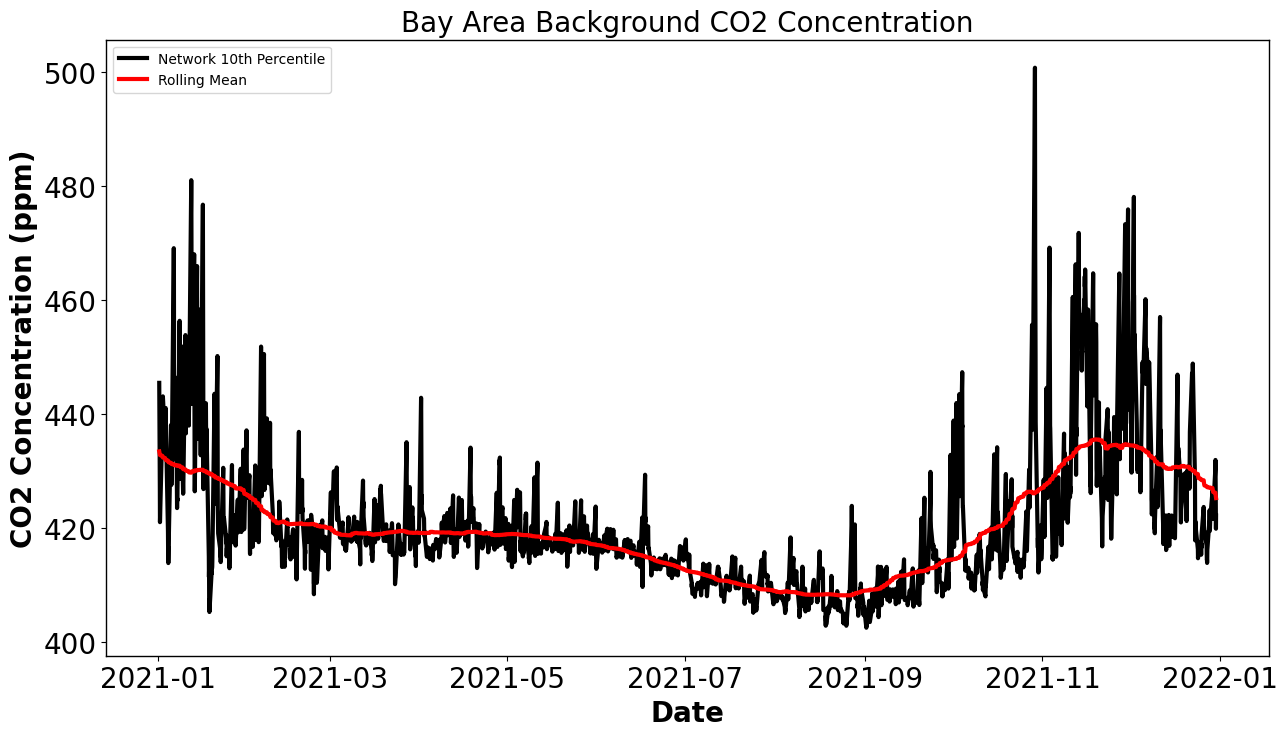

In [ ]:
plt.figure(figsize = (15, 8))

# Creates two lineplots
plt.plot(CO2_vals_filtered['tenth_per'], color = 'black', label = "Network 10th Percentile")
plt.plot(CO2_vals_filtered['tenth_per'].rolling(window=24*14, min_periods=24*6, center=True).mean(), color = 'red', label = 'Rolling Mean')

# Adds a x-axis label
plt.xlabel("Date")

# Adds a y-axis label
plt.ylabel("CO2 Concentration (ppm)")

# Adds a title to our line plot
plt.title("Bay Area Background CO2 Concentration")

# Adds a legend
plt.legend(loc = 'upper left');

**Let's make some observations:**<br>**1. During what month(s) were the lowest background CO2 concentration values found in?**<br> **2. During what month(s) were the highest background CO2 concentration values found in?**<br> **3. What is one natural phenomena that can explain this? (You might need to do a Google search)**
<br>*Write your answer in the cell below. Reminder: "2021-05" for example means the 5th month of 2021 --> May 2021.*

*Double-click to edit this cell and replace the below text with your answer.*
1. (Your response here)
2. (Your response here)
3. (Your response here)

***
#### You've finished with **The Carbon Cycle *In Class* notebook** and are ready to begin **The Carbon Cycle *Student Exploration* notebook**! Good job!